In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import itertools

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Read xls file into a pandas dataframe
file = pd.read_excel("Superstore Data file.xls")
#print data
file

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2011-110422,2011-01-22,2011-01-24,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [ ]:
#check if there is any missing value
file.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#to show any missing value by sum every column
file.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
#basic summary of the dataframe
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

step2 :Nardeen Simon (17108683)

In [ ]:
file.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
#what categories we have
file["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [ ]:
#isolate only data related to furniture
furn= file.loc[file["Category"]=="Furniture"]
#isolate only data related to Office Supplies
office_supp = file.loc[file['Category'] == 'Office Supplies']

In [ ]:
#time span, when was the beginning and end
#year-month-day
furn["Order Date"].min(),furn["Order Date"].max()

(Timestamp('2011-01-07 00:00:00'), Timestamp('2014-12-31 00:00:00'))

In [ ]:
#time span, when was the beginning and end
#year-month-day
office_supp['Order Date'].min(), office_supp['Order Date'].max()

(Timestamp('2011-01-04 00:00:00'), Timestamp('2014-12-31 00:00:00'))

In [ ]:
office_supp = office_supp[['Order Date','Sales']]
office_supp

,Order Date,Sales
2,2013-06-13,14.620
4,2012-10-11,22.368
6,2011-06-09,7.280
8,2011-06-09,18.504
9,2011-06-09,114.900
...,...,...
9982,2013-09-23,35.560
9984,2012-05-17,31.500
9985,2012-05-17,55.600
9992,2014-02-27,29.600


In [ ]:
furn = furn[['Order Date','Sales']]
furn

,Order Date,Sales
0,2013-11-09,261.9600
1,2013-11-09,731.9400
3,2012-10-11,957.5775
5,2011-06-09,48.8600
10,2011-06-09,1706.1840
...,...,...
9962,2012-03-19,383.4656
9964,2013-12-06,13.4000
9980,2012-09-06,85.9800
9989,2011-01-22,25.2480


In [ ]:
office_supp = office_supp.sort_values('Order Date')
#grouping data by the order data and focusing on sales data
office_supp = office_supp.groupby('Order Date')['Sales'].sum().reset_index()
office_supp

,Order Date,Sales
0,2011-01-04,16.448
1,2011-01-05,288.060
2,2011-01-06,19.536
3,2011-01-07,685.340
4,2011-01-08,10.430
...,...,...
1144,2014-12-27,814.594
1145,2014-12-28,13.248
1146,2014-12-29,1091.244
1147,2014-12-30,282.440


In [ ]:
furn = furn.sort_values('Order Date')
#grouping data by the order data and focusing on sales data
furn = furn.groupby('Order Date')['Sales'].sum().reset_index()
furn

,Order Date,Sales
0,2011-01-07,2573.8200
1,2011-01-08,76.7280
2,2011-01-11,51.9400
3,2011-01-12,9.9400
4,2011-01-14,879.9390
...,...,...
885,2014-12-25,1393.4940
886,2014-12-26,832.4540
887,2014-12-29,551.2568
888,2014-12-30,2330.7180


In [ ]:
#indexing for time series data
office_supp = office_supp.set_index('Order Date')
office_supp

,Sales
Order Date,
2011-01-04,16.448
2011-01-05,288.060
2011-01-06,19.536
2011-01-07,685.340
2011-01-08,10.430
...,...
2014-12-27,814.594
2014-12-28,13.248
2014-12-29,1091.244


In [ ]:
#indexing for time series data
furn = furn.set_index('Order Date')
furn

,Sales
Order Date,
2011-01-07,2573.8200
2011-01-08,76.7280
2011-01-11,51.9400
2011-01-12,9.9400
2011-01-14,879.9390
...,...
2014-12-25,1393.4940
2014-12-26,832.4540
2014-12-29,551.2568


In [ ]:
#converting our daily values to our monthly
#we'll use the start of each month as the timestamp

monthly_supp = office_supp['Sales'].resample('MS').sum()
monthly_supp

Order Date
2011-01-01     4851.080
2011-02-01     1071.724
2011-03-01     8605.879
2011-04-01    11155.074
2011-05-01     7135.624
2011-06-01    12953.037
2011-07-01    15121.208
2011-08-01    11379.462
2011-09-01    27423.298
2011-10-01     7211.128
2011-11-01    26862.436
2011-12-01    18006.462
2012-01-01     1808.780
2012-02-01     5426.787
2012-03-01    15823.827
2012-04-01    12558.558
2012-05-01     9113.736
2012-06-01    10647.747
2012-07-01     4719.939
2012-08-01    11735.108
2012-09-01    19305.767
2012-10-01     8673.410
2012-11-01    21218.130
2012-12-01    16201.674
2013-01-01     5299.682
2013-02-01     6683.246
2013-03-01    17458.035
2013-04-01    10639.735
2013-05-01    13006.898
2013-06-01    10901.856
2013-07-01    12677.274
2013-08-01     9218.912
2013-09-01    23285.742
2013-10-01    14798.984
2013-11-01    21428.072
2013-12-01    38112.154
2014-01-01    21703.681
2014-02-01     7390.152
2014-03-01    14317.418
2014-04-01    14921.853
2014-05-01    14137.790
2014-

In [ ]:
#converting our daily values to our monthly
#we'll use the start of each month as the timestamp

monthly_furn = furn['Sales'].resample('MS').sum()
monthly_furn

Order Date
2011-01-01     5951.8590
2011-02-01     2130.3240
2011-03-01    14573.9560
2011-04-01     7944.8370
2011-05-01     6912.7870
2011-06-01    13206.1256
2011-07-01    10821.0510
2011-08-01     7320.3465
2011-09-01    23816.4808
2011-10-01    12304.2470
2011-11-01    21564.8727
2011-12-01    30645.9665
2012-01-01    11739.9416
2012-02-01     3319.1260
2012-03-01    12315.0310
2012-04-01    10475.6985
2012-05-01     9374.9505
2012-06-01     7714.1790
2012-07-01    13674.4200
2012-08-01     9638.5922
2012-09-01    26273.0230
2012-10-01    12026.6235
2012-11-01    30880.8325
2012-12-01    23085.8192
2013-01-01     7622.7430
2013-02-01     3925.5510
2013-03-01    12473.0960
2013-04-01    13405.5900
2013-05-01    15031.1880
2013-06-01    12026.8550
2013-07-01    13199.3110
2013-08-01    13619.3003
2013-09-01    26738.9609
2013-10-01    10130.7720
2013-11-01    33659.3838
2013-12-01    37068.6850
2014-01-01     5964.0320
2014-02-01     6866.3374
2014-03-01    10597.3320
2014-04-01    

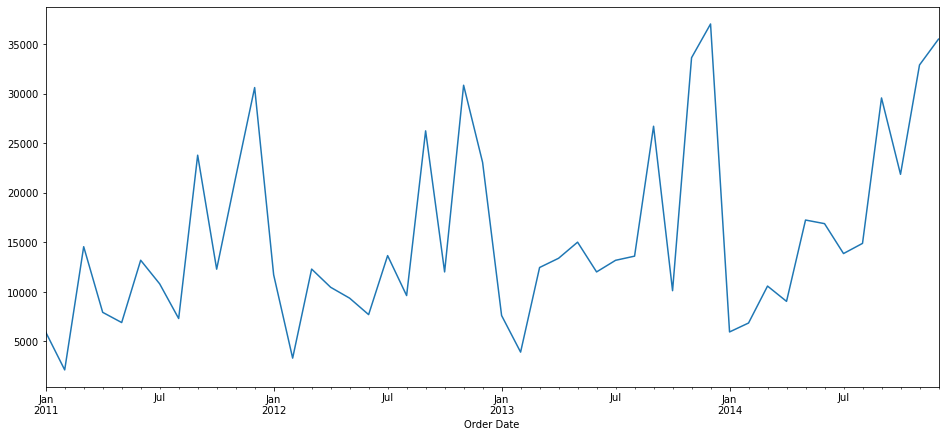

In [ ]:
monthly_furn.plot(figsize = (16, 7))
plt.show()

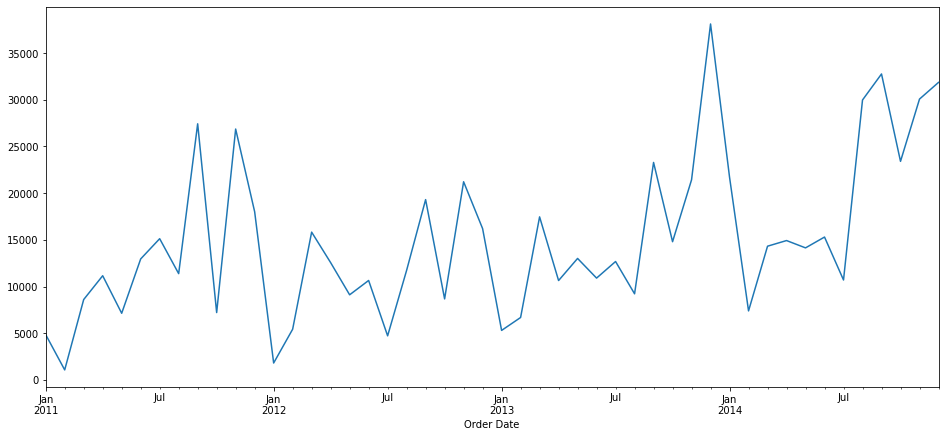

In [ ]:
monthly_supp.plot(figsize = (16, 7))
plt.show()

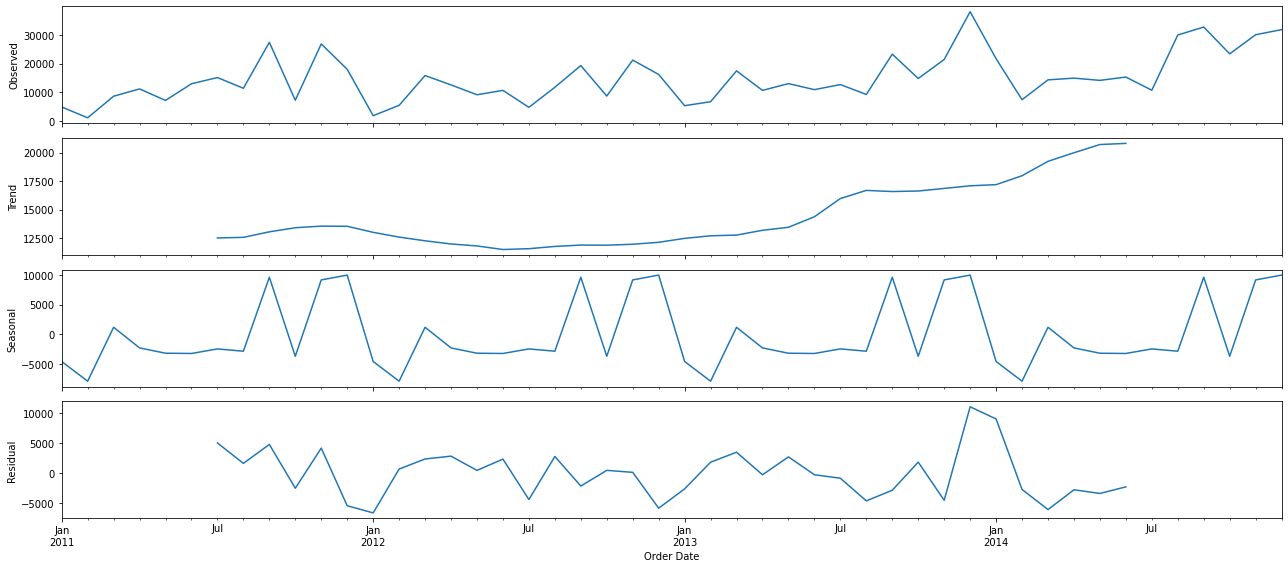

In [ ]:
#adjusting the plot size
from pylab import rcParams
rcParams["figure.figsize"] = 18,8

#creating a decomposition visualization
decomposition = sm.tsa.seasonal_decompose(monthly_supp, model="additive")
fig = decomposition.plot()
plt.show()

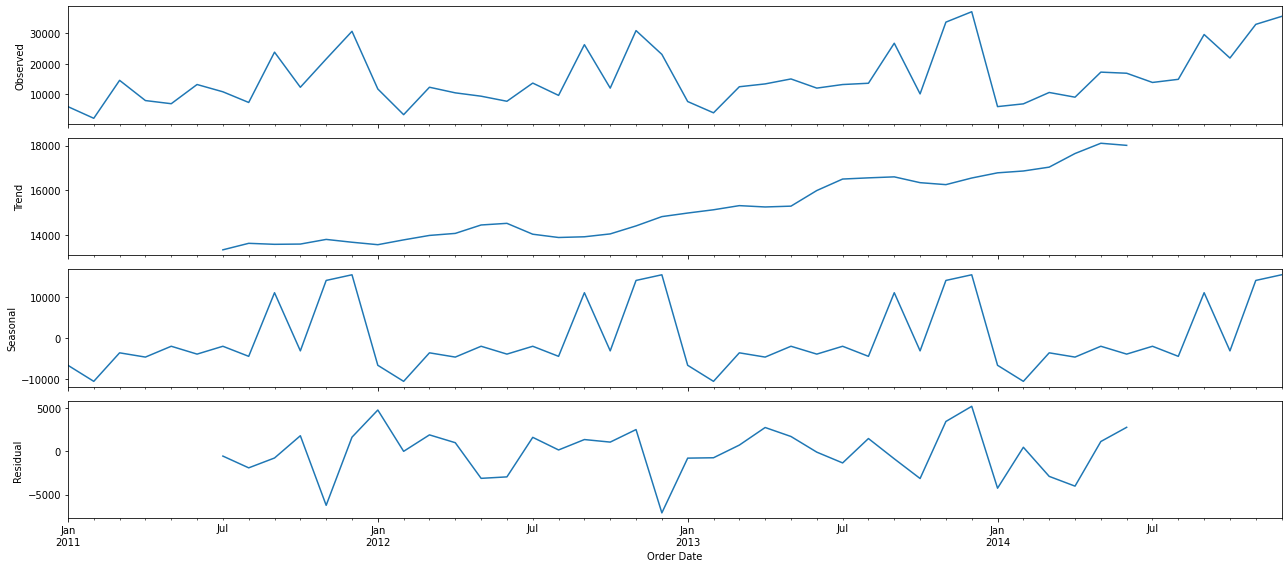

In [ ]:
rcParams["figure.figsize"] = 18,8

#creating a decomposition visualization
decomposition = sm.tsa.seasonal_decompose(monthly_furn, model="additive")
fig = decomposition.plot()
plt.show()

In [ ]:
#...........................................(step3 salma ibrahim).................................................................

In [ ]:
# the simple moving average over a period of 10 years
furn['Sales 4 SMA'] = furn.Sales.rolling(window=4).mean()
office_supp['Sales 4 SMA'] = office_supp.Sales.rolling(window=4).mean()

In [ ]:
#output of Furn SMA
furn

,Sales,Sales 4 SMA
Order Date,,
2011-01-07,2573.8200,NaN
2011-01-08,76.7280,NaN
2011-01-11,51.9400,NaN
2011-01-12,9.9400,678.10700
2011-01-14,879.9390,254.63675
...,...,...
2014-12-25,1393.4940,1444.49600
2014-12-26,832.4540,1648.62950
2014-12-29,551.2568,764.82970


In [ ]:
#output of office_supp SMA
office_supp

,Sales,Sales 4 SMA
Order Date,,
2011-01-04,16.448,NaN
2011-01-05,288.060,NaN
2011-01-06,19.536,NaN
2011-01-07,685.340,252.34600
2011-01-08,10.430,250.84150
...,...,...
2014-12-27,814.594,1227.29725
2014-12-28,13.248,943.18625
2014-12-29,1091.244,846.08775


Text(0.5, 0, 'Order Date')

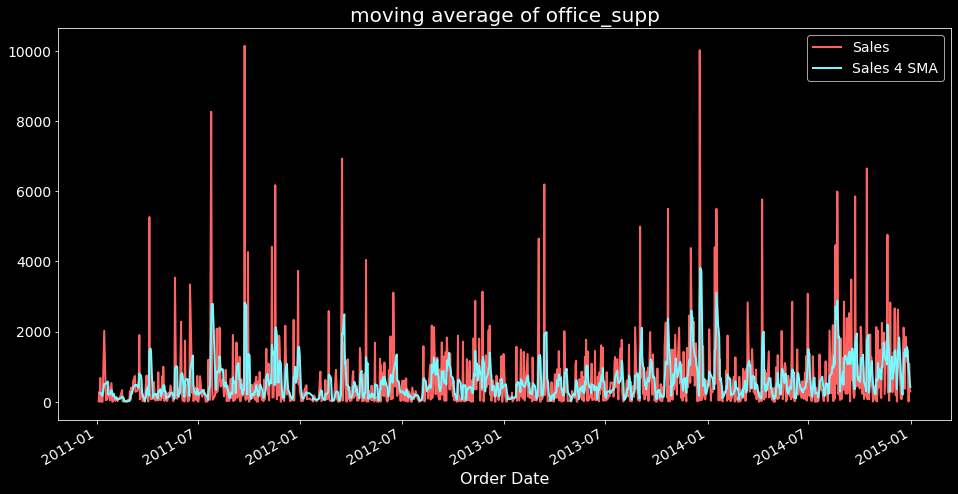

In [ ]:
# colors for the line plot
plt.style.use(['dark_background'])
colors = ['#ff6361', '#78f8ff']

# line plot - the yearly average air temperature in Barcelona
office_supp.plot(color=colors, linewidth=2, figsize=(16,8))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Sales', 'Sales 4 SMA'], fontsize=14)

# title and labels
plt.title('moving average of office_supp', fontsize=20)
plt.xlabel('Order Date', fontsize=16)


Text(0.5, 0, 'Order Date')

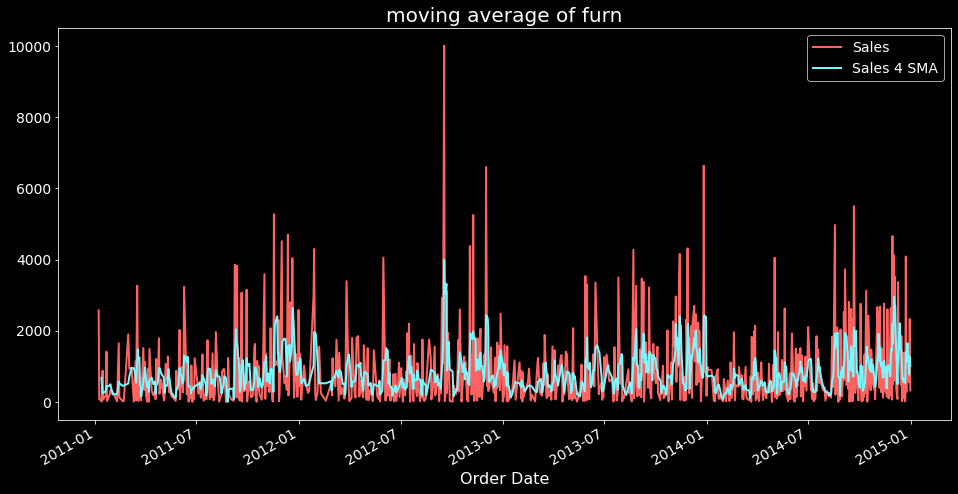

In [ ]:
# colors for the line plot
plt.style.use(['dark_background'])
colors = ['#ff6361', '#78f8ff']

# line plot - the yearly average air temperature in Barcelona
furn.plot(color=colors, linewidth=2, figsize=(16,8))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Sales', 'Sales 4 SMA'], fontsize=14)

# title and labels
plt.title('moving average of furn', fontsize=20)
plt.xlabel('Order Date', fontsize=16)


In [ ]:
# smoothing factor - 0.1
furn['EMA_0.1'] = furn.Sales.ewm(alpha=0.1, adjust=False).mean()
# smoothing factor - 0.5
furn['EMA_0.5'] = furn.Sales.ewm(alpha=0.5, adjust=False).mean()

# smoothing factor - 0.1
office_supp['EMA_0.1'] = office_supp.Sales.ewm(alpha=0.1, adjust=False).mean()
# smoothing factor - 0.5
office_supp['EMA_0.5'] = office_supp.Sales.ewm(alpha=0.5, adjust=False).mean()

In [ ]:
furn

,Sales,Sales 4 SMA,EMA_0.1,EMA_0.5
Order Date,,,,
2011-01-07,2573.8200,NaN,2573.820000,2573.820000
2011-01-08,76.7280,NaN,2324.110800,1325.274000
2011-01-11,51.9400,NaN,2096.893720,688.607000
2011-01-12,9.9400,678.10700,1888.198348,349.273500
2011-01-14,879.9390,254.63675,1787.372413,614.606250
...,...,...,...,...
2014-12-25,1393.4940,1444.49600,1232.678767,1312.882235
2014-12-26,832.4540,1648.62950,1192.656290,1072.668117
2014-12-29,551.2568,764.82970,1128.516341,811.962459


In [ ]:
office_supp

,Sales,Sales 4 SMA,EMA_0.1,EMA_0.5
Order Date,,,,
2011-01-04,16.448,NaN,16.448000,16.448000
2011-01-05,288.060,NaN,43.609200,152.254000
2011-01-06,19.536,NaN,41.201880,85.895000
2011-01-07,685.340,252.34600,105.615692,385.617500
2011-01-08,10.430,250.84150,96.097123,198.023750
...,...,...,...,...
2014-12-27,814.594,1227.29725,1192.786964,1131.677203
2014-12-28,13.248,943.18625,1074.833068,572.462601
2014-12-29,1091.244,846.08775,1076.474161,831.853301


Text(0.5, 0, 'order date')

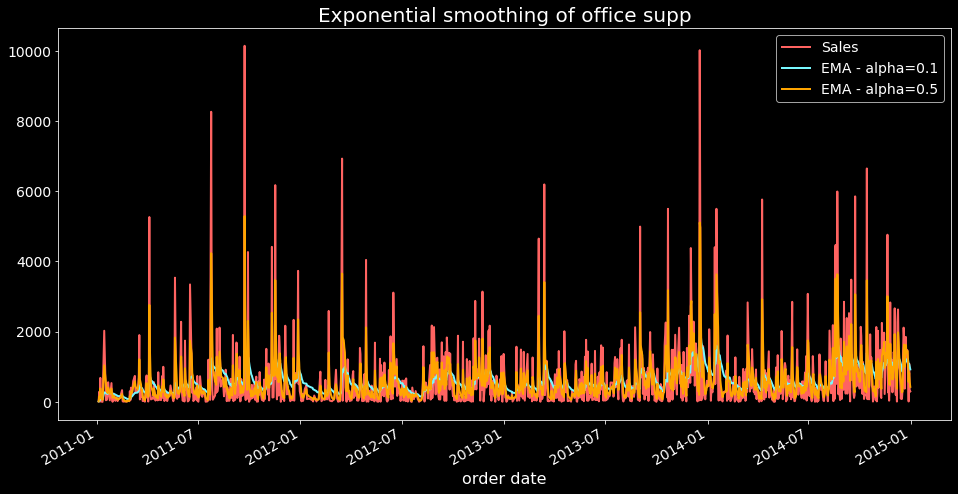

In [ ]:
# colors for the line plot
#colors = ['green', 'orchid', 'orange']
colors = ['#ff6361', '#78f8ff','orange']

# line plot - the yearly average air temperature in Barcelona
office_supp[['Sales', 'EMA_0.1', 'EMA_0.5']].plot(color=colors, linewidth=2, figsize=(16,8), )

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Sales', 'EMA - alpha=0.1', 'EMA - alpha=0.5'], fontsize=14)

# title and labels
plt.title('Exponential smoothing of office supp', fontsize=20)
plt.xlabel('order date', fontsize=16)

Text(0.5, 0, 'order date')

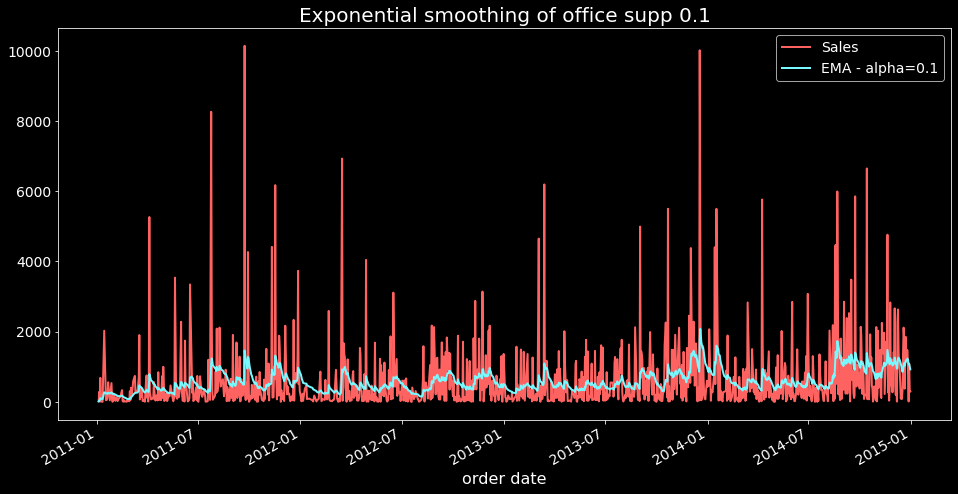

In [ ]:
# colors for the line plot
#colors = ['green', 'orchid', 'orange']
colors = ['#ff6361', '#78f8ff']

# line plot - the yearly average air temperature in Barcelona
office_supp[['Sales', 'EMA_0.1']].plot(color=colors, linewidth=2, figsize=(16,8), )

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Sales', 'EMA - alpha=0.1'], fontsize=14)

# title and labels
plt.title('Exponential smoothing of office supp 0.1', fontsize=20)
plt.xlabel('order date', fontsize=16)

Text(0.5, 0, 'order date')

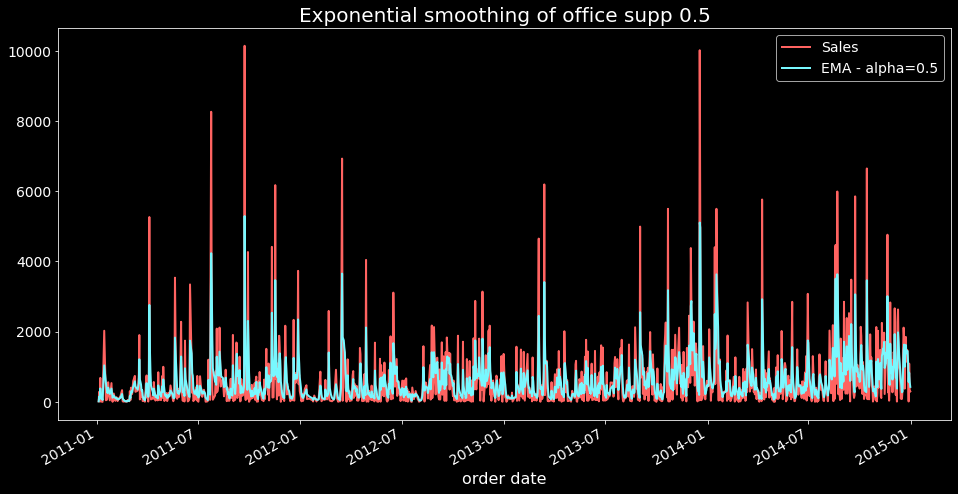

In [ ]:
# colors for the line plot
#colors = ['green', 'orchid', 'orange']
colors = ['#ff6361', '#78f8ff']

# line plot - the yearly average air temperature in Barcelona
office_supp[['Sales', 'EMA_0.5']].plot(color=colors, linewidth=2, figsize=(16,8), )

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Sales', 'EMA - alpha=0.5'], fontsize=14)

# title and labels
plt.title('Exponential smoothing of office supp 0.5', fontsize=20)
plt.xlabel('order date', fontsize=16)

Text(0.5, 0, 'order date')

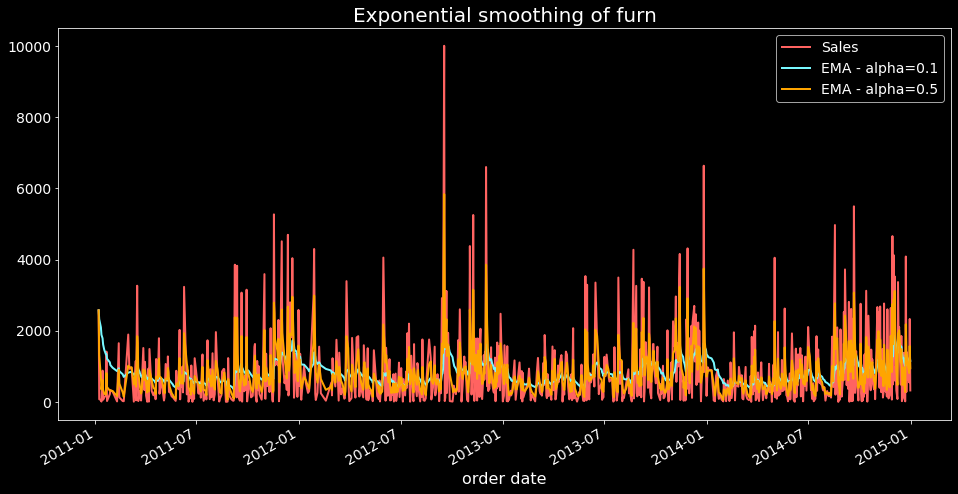

In [ ]:
# colors for the line plot
#colors = ['green', 'orchid', 'orange']
colors = ['#ff6361', '#78f8ff','orange']

# line plot - the yearly average air temperature in Barcelona
furn[['Sales', 'EMA_0.1', 'EMA_0.5']].plot(color=colors, linewidth=2, figsize=(16,8), )

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Sales', 'EMA - alpha=0.1', 'EMA - alpha=0.5'], fontsize=14)

# title and labels
plt.title('Exponential smoothing of furn', fontsize=20)
plt.xlabel('order date', fontsize=16)

Text(0.5, 0, 'order date')

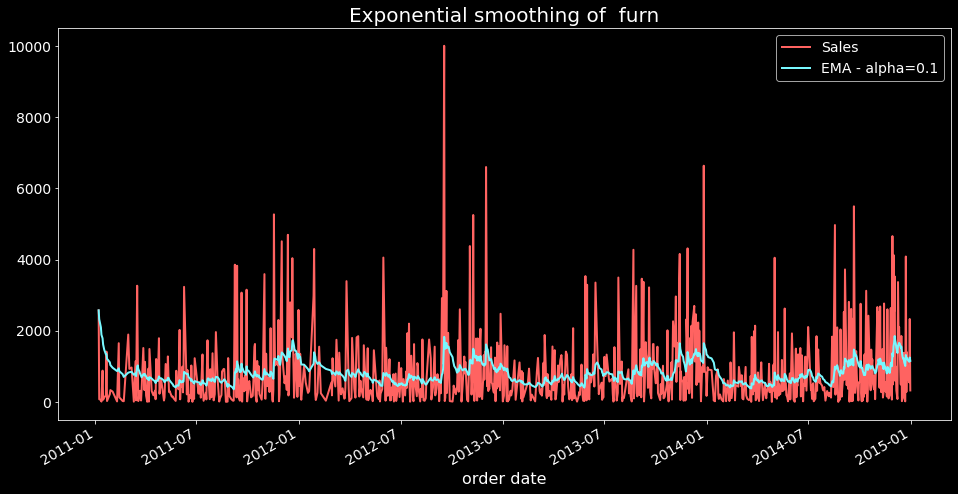

In [ ]:
# colors for the line plot
#colors = ['green', 'orchid', 'orange']
colors = ['#ff6361', '#78f8ff']

# line plot - the yearly average air temperature in Barcelona
furn[['Sales', 'EMA_0.1']].plot(color=colors, linewidth=2, figsize=(16,8), )

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Sales', 'EMA - alpha=0.1'], fontsize=14)

# title and labels
plt.title('Exponential smoothing of  furn', fontsize=20)
plt.xlabel('order date', fontsize=16)

Text(0.5, 0, 'order date')

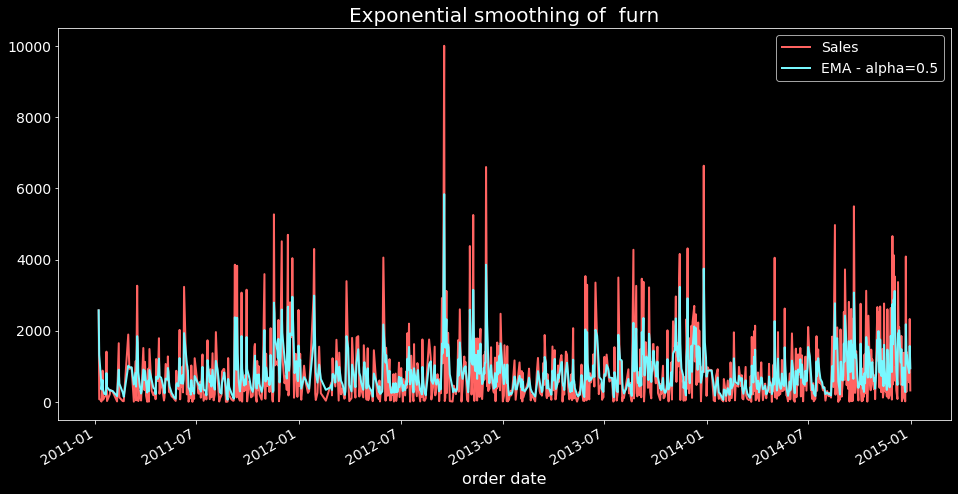

In [ ]:
# colors for the line plot
#colors = ['green', 'orchid', 'orange']
colors = ['#ff6361', '#78f8ff']

# line plot - the yearly average air temperature in Barcelona
furn[['Sales', 'EMA_0.5']].plot(color=colors, linewidth=2, figsize=(16,8), )

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Sales', 'EMA - alpha=0.5'], fontsize=14)

# title and labels
plt.title('Exponential smoothing of  furn', fontsize=20)
plt.xlabel('order date', fontsize=16)

In [ ]:
#............................................ STEP 4 (mehrail antonyos 17108630)...................................................
#................................................................................................................
#................................................................................................................

In [ ]:
#to extract furniture and office sales from category
realsale=file[~(file['Category'] == 'Technology')]
realsale

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,9986,CA-2012-100251,2012-05-17,2012-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,New York,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.6000,4,0.00,16.1240
9989,9990,CA-2011-110422,2011-01-22,2011-01-24,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9992,9993,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [ ]:
furn

,Sales,Sales 4 SMA,EMA_0.1,EMA_0.5
Order Date,,,,
2011-01-07,2573.8200,NaN,2573.820000,2573.820000
2011-01-08,76.7280,NaN,2324.110800,1325.274000
2011-01-11,51.9400,NaN,2096.893720,688.607000
2011-01-12,9.9400,678.10700,1888.198348,349.273500
2011-01-14,879.9390,254.63675,1787.372413,614.606250
...,...,...,...,...
2014-12-25,1393.4940,1444.49600,1232.678767,1312.882235
2014-12-26,832.4540,1648.62950,1192.656290,1072.668117
2014-12-29,551.2568,764.82970,1128.516341,811.962459


In [ ]:
#check if there is any missing value
furn.isnull()

,Sales,Sales 4 SMA,EMA_0.1,EMA_0.5
Order Date,,,,
2011-01-07,False,True,False,False
2011-01-08,False,True,False,False
2011-01-11,False,True,False,False
2011-01-12,False,False,False,False
2011-01-14,False,False,False,False
...,...,...,...,...
2014-12-25,False,False,False,False
2014-12-26,False,False,False,False
2014-12-29,False,False,False,False


In [ ]:
#to show any missing value by sum every column
furn.isnull().sum()

Sales          0
Sales 4 SMA    3
EMA_0.1        0
EMA_0.5        0
dtype: int64

In [ ]:
#to replace missing value with the first existing value forward
newfurn = furn.fillna(method = 'bfill')
newfurn

,Sales,Sales 4 SMA,EMA_0.1,EMA_0.5
Order Date,,,,
2011-01-07,2573.8200,678.10700,2573.820000,2573.820000
2011-01-08,76.7280,678.10700,2324.110800,1325.274000
2011-01-11,51.9400,678.10700,2096.893720,688.607000
2011-01-12,9.9400,678.10700,1888.198348,349.273500
2011-01-14,879.9390,254.63675,1787.372413,614.606250
...,...,...,...,...
2014-12-25,1393.4940,1444.49600,1232.678767,1312.882235
2014-12-26,832.4540,1648.62950,1192.656290,1072.668117
2014-12-29,551.2568,764.82970,1128.516341,811.962459


In [ ]:
ytFURN = newfurn["Sales"]
ytFURN 

Order Date
2011-01-07    2573.8200
2011-01-08      76.7280
2011-01-11      51.9400
2011-01-12       9.9400
2011-01-14     879.9390
                ...    
2014-12-25    1393.4940
2014-12-26     832.4540
2014-12-29     551.2568
2014-12-30    2330.7180
2014-12-31     323.1360
Name: Sales, Length: 890, dtype: float64

In [ ]:
ftFURNmovingaverage = newfurn["Sales 4 SMA"]
ftFURNmovingaverage

Order Date
2011-01-07     678.10700
2011-01-08     678.10700
2011-01-11     678.10700
2011-01-12     678.10700
2011-01-14     254.63675
                 ...    
2014-12-25    1444.49600
2014-12-26    1648.62950
2014-12-29     764.82970
2014-12-30    1276.98070
2014-12-31    1009.39120
Name: Sales 4 SMA, Length: 890, dtype: float64

In [ ]:
#to get delta t (error) for furnature - sale
errorFURNmovingaverage = ytFURN - ftFURNmovingaverage
errorFURNmovingaverage

Order Date
2011-01-07    1895.71300
2011-01-08    -601.37900
2011-01-11    -626.16700
2011-01-12    -668.16700
2011-01-14     625.30225
                 ...    
2014-12-25     -51.00200
2014-12-26    -816.17550
2014-12-29    -213.57290
2014-12-30    1053.73730
2014-12-31    -686.25520
Length: 890, dtype: float64

In [ ]:
for i in errorFURNmovingaverage:
  print(i)

1895.7130000000002
-601.3790000000001
-626.1670000000001
-668.167
625.3022499999998
-188.98475
-142.63174999999998
-131.14824999999996
967.4990000000001
-411.5850000000001
-242.1570000000001
-164.23950000000008
74.13749999999999
-199.29649999999998
1077.9810000000002
-391.64300000000014
-429.6745000000001
-435.9545000000001
1376.73425
211.73275000000012
14.458750000000009
-941.2052500000001
378.9134999999999
-494.5340000000001
2150.4385
-15.874000000000024
-1174.588
-999.6760000000002
-198.93250000000012
-117.3120000000001
123.54949999999991
956.0764999999999
187.4872499999998
-443.5077500000001
159.33674999999994
-454.06424999999984
-404.9314999999998
372.87850000000014
-272.41349999999994
878.7630000000003
-376.1172500000001
-310.4502500000001
-258.1767500000001
-146.22424999999998
758.9680000000001
39.10799999999995
876.01
-722.5350000000001
-178.15949999999987
-633.1635
-129.32925000000003
600.29925
146.54199999999997
509.00699999999983
-186.96325000000002
-445.57475
-340.183499999

In [ ]:
#to calculate LAD for furnature - sale
ladFURNmovigaverage = abs(errorFURNmovingaverage.max())
ladFURNmovigaverage

6010.2325

In [ ]:
#to calculate MSE for furnature - sale
counter1 = 0
n1 = 0
for i in errorFURNmovingaverage:
  counter1 = counter1 + (i*i)
  n1 = n1 + 1
mseFURNmovigaverage = counter1 / n1  
mseFURNmovigaverage

734547.7731805482

In [ ]:
#to get absolute value of delta t in furnature - sale to use in MAPE rule
absoluteFURNDeltat = abs(errorFURNmovingaverage)
absoluteFURNDeltat

Order Date
2011-01-07    1895.71300
2011-01-08     601.37900
2011-01-11     626.16700
2011-01-12     668.16700
2011-01-14     625.30225
                 ...    
2014-12-25      51.00200
2014-12-26     816.17550
2014-12-29     213.57290
2014-12-30    1053.73730
2014-12-31     686.25520
Length: 890, dtype: float64

In [ ]:
#to calculate MAPE for furnature - sale
counter2 = 0
n2 = 0
for j in absoluteFURNDeltat:
  for k in ytFURN:
    counter2 = (j / k) + counter2
    #break #0.2307698064364435
  n2 = n2 + 1 
mapeFURNmovigaverage = counter2 / n2
mapeFURNmovigaverage

5899.986429114242

In [ ]:
ftFURNexpi = newfurn["EMA_0.1"]
ftFURNexpi

Order Date
2011-01-07    2573.820000
2011-01-08    2324.110800
2011-01-11    2096.893720
2011-01-12    1888.198348
2011-01-14    1787.372413
                 ...     
2014-12-25    1232.678767
2014-12-26    1192.656290
2014-12-29    1128.516341
2014-12-30    1248.736507
2014-12-31    1156.176456
Name: EMA_0.1, Length: 890, dtype: float64

In [ ]:
#to get delta t (error) for exponential (i) - sale
errorFURNexpi = ytFURN - ftFURNexpi
errorFURNexpi

Order Date
2011-01-07       0.000000
2011-01-08   -2247.382800
2011-01-11   -2044.953720
2011-01-12   -1878.258348
2011-01-14    -907.433413
                 ...     
2014-12-25     160.815233
2014-12-26    -360.202290
2014-12-29    -577.259541
2014-12-30    1081.981493
2014-12-31    -833.040456
Length: 890, dtype: float64

In [ ]:
for i in errorFURNexpi:
  print(i)

0.0
-2247.3828
-2044.95372
-1878.2583479999998
-907.4334132000001
-1552.8711718799998
-1338.9544546919997
-1156.1296092227997
68.31935169948042
-1187.9483834704677
-896.3967451234209
-702.5370706110789
-670.383963549971
-851.840967194974
705.2841295245236
-733.678083427929
-754.2774750851361
-683.2057275766224
1071.4223451810396
95.60641066293579
120.4095695966422
-754.4289873630221
339.4539113732801
-679.293079764048
2286.2168282123566
435.09314539112097
-902.1139691479912
-608.2145722331921
-490.6715150098729
-688.0891635088856
-325.60484715799697
740.6254375578027
104.54259380202222
-407.99736557817994
346.0703709796379
-541.5638661183257
-642.3964795064932
256.9657684441562
-600.7124084002594
790.1546324397668
-350.07153080421017
-423.72947772378916
-264.98832995141026
-455.31569695626933
606.7388727393577
-12.412014534578361
1073.5181869188796
-437.84263177300846
-33.406768595707604
-562.293691736137
-426.6582225625233
460.8384996937292
0.9157497243561465
605.9148747519204
55.5199

In [ ]:
#to calculate LAD for exponential (i) - sale
ladFURexpi = abs(errorFURNexpi.max())
ladFURexpi

8176.98023027258

In [ ]:
#to calculate MSE for exponential (i) - sale
counter3 = 0
n3 = 0
for l in errorFURNexpi:
  counter3 = counter3 + (l*l)
  n3 = n3 + 1
mseFURNexpi = counter3 / n3  
mseFURNexpi

865607.4409536271

In [ ]:
#to get absolute value of delta t in exponential (i) - sale to use in MAPE rule
absoluteFURNDeltatexpi = abs(errorFURNexpi)
absoluteFURNDeltatexpi

Order Date
2011-01-07       0.000000
2011-01-08    2247.382800
2011-01-11    2044.953720
2011-01-12    1878.258348
2011-01-14     907.433413
                 ...     
2014-12-25     160.815233
2014-12-26     360.202290
2014-12-29     577.259541
2014-12-30    1081.981493
2014-12-31     833.040456
Length: 890, dtype: float64

In [ ]:
#to calculate MAPE for exponential (i) - sale
counter4 = 0
n4 = 0
for m in absoluteFURNDeltatexpi:
  for p in ytFURN:
    counter4 = (m / p) + counter4
    #break #0.2307698064364435
  n4 = n4 + 1 
mapeFURNexpi = counter4 / n4
mapeFURNexpi

6404.78740107628

In [ ]:
ftFURNexpii = newfurn["EMA_0.5"]
ftFURNexpii

Order Date
2011-01-07    2573.820000
2011-01-08    1325.274000
2011-01-11     688.607000
2011-01-12     349.273500
2011-01-14     614.606250
                 ...     
2014-12-25    1312.882235
2014-12-26    1072.668117
2014-12-29     811.962459
2014-12-30    1571.340229
2014-12-31     947.238115
Name: EMA_0.5, Length: 890, dtype: float64

In [ ]:
#to get delta t (error) for exponential (ii) - sale
errorFURNexpii = ytFURN - ftFURNexpii
errorFURNexpii

Order Date
2011-01-07       0.000000
2011-01-08   -1248.546000
2011-01-11    -636.667000
2011-01-12    -339.333500
2011-01-14     265.332750
                 ...     
2014-12-25      80.611765
2014-12-26    -240.214117
2014-12-29    -260.705659
2014-12-30     759.377771
2014-12-31    -624.102115
Length: 890, dtype: float64

In [ ]:
for i in errorFURNexpii:
  print(i)

0.0
-1248.546
-636.6670000000001
-339.3335000000001
265.3327499999999
-276.323125
-105.58956249999997
-25.61178124999998
603.2141093750001
-392.5239453125001
-100.28597265625007
7.757013671874972
-17.288493164062515
-146.69724658203126
744.3963767089845
-388.04281164550787
-246.2254058227539
-125.53270291137696
874.0711485443114
-45.560925727844165
-3.6894628639220173
-481.1767314319611
325.2116342840195
-384.5061828579903
1417.5139085710048
-192.63304571449748
-815.0375228572487
-294.35876142862446
-115.66738071431223
-194.76969035715612
65.76815482142194
607.145077410711
-8.660961294644494
-283.26698064732216
254.62650967633886
-346.5907451618305
-259.40037258091525
334.25681370954237
-295.08359314522886
591.7892034273857
-293.6668982863073
-207.20294914315366
-38.95247457157683
-139.9352372857884
494.7673813571058
-62.881309321447134
571.1643453392765
-494.4228273303617
-46.849413665180805
-319.1067068325905
-115.43885341629525
411.63107329185243
-24.094963354073798
324.114018322963

In [ ]:
#to calculate LAD for exponential (ii) - sale
ladFURexpii = abs(errorFURNexpii.max())
ladFURexpii

4168.726165786431

In [ ]:
#to calculate MSE for exponential (ii) - sale
counter5 = 0
n5 = 0
for q in errorFURNexpii:
  counter5 = counter5 + (q*q)
  n5 = n5 + 1
mseFURNexpii = counter5 / n5  
mseFURNexpii

334982.06249149155

In [ ]:
#to get absolute value of delta t in exponential (ii)- sale to use in MAPE rule
absoluteFURNDeltatexpii = abs(errorFURNexpii)
absoluteFURNDeltatexpii

Order Date
2011-01-07       0.000000
2011-01-08    1248.546000
2011-01-11     636.667000
2011-01-12     339.333500
2011-01-14     265.332750
                 ...     
2014-12-25      80.611765
2014-12-26     240.214117
2014-12-29     260.705659
2014-12-30     759.377771
2014-12-31     624.102115
Length: 890, dtype: float64

In [ ]:
#to calculate MAPE for exponential (ii) - sale
counter6 = 0
n6 = 0
for r in absoluteFURNDeltatexpii:
  for s in ytFURN:
    counter6 = (r / s) + counter6
    #break #0.2307698064364435
  n6 = n6 + 1 
mapeFURNexpii = counter6 / n6
mapeFURNexpii

3929.8696035626826

In [ ]:
#---------------------------------------------------for office-----------------------------------------------------

In [ ]:
office_supp

,Sales,Sales 4 SMA,EMA_0.1,EMA_0.5
Order Date,,,,
2011-01-04,16.448,NaN,16.448000,16.448000
2011-01-05,288.060,NaN,43.609200,152.254000
2011-01-06,19.536,NaN,41.201880,85.895000
2011-01-07,685.340,252.34600,105.615692,385.617500
2011-01-08,10.430,250.84150,96.097123,198.023750
...,...,...,...,...
2014-12-27,814.594,1227.29725,1192.786964,1131.677203
2014-12-28,13.248,943.18625,1074.833068,572.462601
2014-12-29,1091.244,846.08775,1076.474161,831.853301


In [ ]:
#check if there is any missing value
office_supp.isnull()

,Sales,Sales 4 SMA,EMA_0.1,EMA_0.5
Order Date,,,,
2011-01-04,False,True,False,False
2011-01-05,False,True,False,False
2011-01-06,False,True,False,False
2011-01-07,False,False,False,False
2011-01-08,False,False,False,False
...,...,...,...,...
2014-12-27,False,False,False,False
2014-12-28,False,False,False,False
2014-12-29,False,False,False,False


In [ ]:
#to show any missing value by sum every column
office_supp.isnull().sum()

Sales          0
Sales 4 SMA    3
EMA_0.1        0
EMA_0.5        0
dtype: int64

In [ ]:
#to replace missing value with the first existing value forward
newofficesupp = office_supp.fillna(method = 'bfill')
newofficesupp

,Sales,Sales 4 SMA,EMA_0.1,EMA_0.5
Order Date,,,,
2011-01-04,16.448,252.34600,16.448000,16.448000
2011-01-05,288.060,252.34600,43.609200,152.254000
2011-01-06,19.536,252.34600,41.201880,85.895000
2011-01-07,685.340,252.34600,105.615692,385.617500
2011-01-08,10.430,250.84150,96.097123,198.023750
...,...,...,...,...
2014-12-27,814.594,1227.29725,1192.786964,1131.677203
2014-12-28,13.248,943.18625,1074.833068,572.462601
2014-12-29,1091.244,846.08775,1076.474161,831.853301


In [ ]:
ytOFFICE = newofficesupp["Sales"]
ytOFFICE 

Order Date
2011-01-04      16.448
2011-01-05     288.060
2011-01-06      19.536
2011-01-07     685.340
2011-01-08      10.430
                ...   
2014-12-27     814.594
2014-12-28      13.248
2014-12-29    1091.244
2014-12-30     282.440
2014-12-31     299.724
Name: Sales, Length: 1149, dtype: float64

In [ ]:
ftOFFICEmovingaverage = newofficesupp["Sales 4 SMA"]
ftOFFICEmovingaverage

Order Date
2011-01-04     252.34600
2011-01-05     252.34600
2011-01-06     252.34600
2011-01-07     252.34600
2011-01-08     250.84150
                 ...    
2014-12-27    1227.29725
2014-12-28     943.18625
2014-12-29     846.08775
2014-12-30     550.38150
2014-12-31     421.66400
Name: Sales 4 SMA, Length: 1149, dtype: float64

In [ ]:
#to get delta t (error) for office MA - sale
errorOFFICEmovingaverage = ytOFFICE - ftOFFICEmovingaverage
errorOFFICEmovingaverage

Order Date
2011-01-04   -235.89800
2011-01-05     35.71400
2011-01-06   -232.81000
2011-01-07    432.99400
2011-01-08   -240.41150
                ...    
2014-12-27   -412.70325
2014-12-28   -929.93825
2014-12-29    245.15625
2014-12-30   -267.94150
2014-12-31   -121.94000
Length: 1149, dtype: float64

In [ ]:
for i in errorOFFICEmovingaverage:
  print(i)

-235.898
35.714
-232.81
432.994
-240.4115
-171.81850000000003
-174.11100000000005
1514.6710000000003
-473.34250000000014
-471.01850000000013
-387.3170000000001
342.66050000000007
-171.0895
201.64650000000006
-215.54
-166.1565
21.795500000000004
-61.50999999999999
4.055500000000009
8.713499999999982
-47.581500000000005
-15.14200000000001
63.35100000000003
190.61399999999998
-124.134
-122.47399999999999
-51.13299999999997
-11.683999999999978
-9.24799999999998
-13.310499999999983
5.97150000000002
-1.7894999999999808
31.84050000000002
-7.026999999999983
205.78900000000002
-56.19799999999999
211.86100000000005
87.46400000000006
-37.99000000000001
194.77249999999998
258.93650000000014
-173.60849999999994
-173.08449999999988
-91.67049999999983
290.0785000000003
1095.605
-677.5294999999999
-398.8774999999998
-471.3477499999998
110.27475000000021
-193.47774999999973
-93.57824999999974
-65.48849999999975
-25.866499999999764
413.2960000000003
405.1660000000004
-246.48649999999975
-191.63349999999

In [ ]:
#to calculate LAD for office - sale
ladOFFICEmovigaverage = abs(errorOFFICEmovingaverage.max())
ladOFFICEmovigaverage

7345.626999999999

In [ ]:
#to calculate MSE for office - sale
counter7 = 0
n7 = 0
for t in errorOFFICEmovingaverage:
  counter7 = counter7 + (t*t)
  n7 = n7 + 1
mseOFFICENmovigaverage = counter7 / n7  
mseOFFICENmovigaverage

710727.33318082

In [ ]:
#to get absolute value of delta t in office - sale to use in MAPE rule
absoluteOFFICEDeltat = abs(errorOFFICEmovingaverage)
absoluteOFFICEDeltat

Order Date
2011-01-04    235.89800
2011-01-05     35.71400
2011-01-06    232.81000
2011-01-07    432.99400
2011-01-08    240.41150
                ...    
2014-12-27    412.70325
2014-12-28    929.93825
2014-12-29    245.15625
2014-12-30    267.94150
2014-12-31    121.94000
Length: 1149, dtype: float64

In [ ]:
#to calculate MAPE for office - sale
counter8 = 0
n8 = 0
for u in absoluteOFFICEDeltat:
  for v in ytOFFICE:
    counter8 = (u / v) + counter8
    #break #0.2307698064364435
  n8 = n8 + 1 
mapeOFFICEmovigaverage = counter8 / n8
mapeOFFICEmovigaverage

9257.815598949792

In [ ]:
ftOFFICEexpi = newofficesupp["EMA_0.1"]
ftOFFICEexpi

Order Date
2011-01-04      16.448000
2011-01-05      43.609200
2011-01-06      41.201880
2011-01-07     105.615692
2011-01-08      96.097123
                 ...     
2014-12-27    1192.786964
2014-12-28    1074.833068
2014-12-29    1076.474161
2014-12-30     997.070745
2014-12-31     927.336070
Name: EMA_0.1, Length: 1149, dtype: float64

In [ ]:
#to get delta t (error) for exponential (i) - sale
errorOFFICEexpi = ytOFFICE - ftOFFICEexpi
errorOFFICEexpi

Order Date
2011-01-04       0.000000
2011-01-05     244.450800
2011-01-06     -21.665880
2011-01-07     579.724308
2011-01-08     -85.667123
                 ...     
2014-12-27    -378.192964
2014-12-28   -1061.585068
2014-12-29      14.769839
2014-12-30    -714.630745
2014-12-31    -627.612070
Length: 1149, dtype: float64

In [ ]:
for i in errorOFFICEexpi:
  print(i)

0.0
244.45080000000002
-21.66588
579.7243080000001
-85.66712280000003
-78.07781052000003
-76.07862946800002
1753.3326334788003
-202.61102986908008
-167.7663268821721
-31.955694193954912
298.2152752254407
-194.57525229710348
266.5122729326069
-158.88395436065383
-223.76335892458843
11.527776967870409
-178.45760072891665
-100.82844065602497
-57.2007965904225
-150.86951693138022
-98.87536523824222
-4.441828714417994
156.07275415702375
-143.3909212586786
-140.13982913281075
-85.47464621952966
-114.3527815975767
-102.61510343781902
-96.05259309403714
-76.91633378463342
-76.49310040617007
-28.966590365553067
-58.66433132899776
202.586101803902
-44.5013083764882
280.27322246116063
219.26270021504462
66.96243019354009
391.90358717418604
485.80342845676756
29.620285611090708
46.32865704998164
54.44519134498347
382.0384722104852
1432.2856249894367
-360.6249375095071
-66.24444375855643
-247.55529938270078
-51.28586944443077
-330.0280824999877
-277.24327424998893
-246.66954682499005
-261.535992142

In [ ]:
#to calculate LAD for exponential (i) - sale
ladOFFICEexpi = abs(errorOFFICEexpi.max())
ladOFFICEexpi

8679.466057967704

In [ ]:
#to calculate MSE for exponential (i) - sale
counter9 = 0
n9 = 0
for w in errorOFFICEexpi:
  counter9 = counter9 + (w*w)
  n9 = n9 + 1
mseOFFICEexpi = counter9 / n9  
mseOFFICEexpi

808896.4737657409

In [ ]:
#to get absolute value of delta t in exponential (i) - sale to use in MAPE rule
absoluteOFFICEDeltatexpi = abs(errorOFFICEexpi)
absoluteOFFICEDeltatexpi

Order Date
2011-01-04       0.000000
2011-01-05     244.450800
2011-01-06      21.665880
2011-01-07     579.724308
2011-01-08      85.667123
                 ...     
2014-12-27     378.192964
2014-12-28    1061.585068
2014-12-29      14.769839
2014-12-30     714.630745
2014-12-31     627.612070
Length: 1149, dtype: float64

In [ ]:
#to calculate MAPE for exponential (i) - sale
counter10 = 0
n10 = 0
for aa in absoluteOFFICEDeltatexpi:
  for bb in ytOFFICE:
    counter10 = (aa / bb) + counter10
    #break #0.2307698064364435
  n10 = n10 + 1 
mapeOFFICEexpi = counter10 / n10
mapeOFFICEexpi

9964.242317185292

In [ ]:
ftOFFICEexpii = newofficesupp["EMA_0.5"]
ftOFFICEexpii

Order Date
2011-01-04      16.448000
2011-01-05     152.254000
2011-01-06      85.895000
2011-01-07     385.617500
2011-01-08     198.023750
                 ...     
2014-12-27    1131.677203
2014-12-28     572.462601
2014-12-29     831.853301
2014-12-30     557.146650
2014-12-31     428.435325
Name: EMA_0.5, Length: 1149, dtype: float64

In [ ]:
#to get delta t (error) for exponential (ii) - sale
errorOFFICEexpii = ytOFFICE - ftOFFICEexpii
errorOFFICEexpii

Order Date
2011-01-04      0.000000
2011-01-05    135.806000
2011-01-06    -66.359000
2011-01-07    299.722500
2011-01-08   -187.593750
                 ...    
2014-12-27   -317.083203
2014-12-28   -559.214601
2014-12-29    259.390699
2014-12-30   -274.706650
2014-12-31   -128.711325
Length: 1149, dtype: float64

In [ ]:
for i in errorOFFICEexpii:
  print(i)

0.0
135.806
-66.359
299.7225
-187.59375
-94.339875
-50.3969375
986.9145312500002
-495.77073437500013
-239.7833671875001
-53.761683593750064
154.772158203125
-179.8189208984375
155.44053955078124
-143.80473022460941
-116.7733651123047
59.89931744384765
-74.95734127807617
-4.265670639038078
16.50316468048095
-46.96441765975952
-2.9782088298797618
45.48089558506014
111.66844779253003
-101.86377610373496
-57.09188805186748
-5.9619440259337395
-23.772972012966868
-11.718486006483435
-7.914243003241719
1.337878498379144
-3.369060750810428
20.469469624594787
-7.873265187702607
137.9433674061487
-57.04431629692566
149.4358418515372
56.39392092576861
-44.2330395371157
162.12648023144214
155.00224011572118
-148.9448799421395
-63.54443997106972
-24.689219985534862
172.6763900072326
691.0331950036161
-570.973402498192
-141.97670124909598
-175.39685062454797
7.587074687725988
-153.91246265613697
-65.96623132806849
-31.40011566403423
-37.663057832017124
270.8134710839915
219.7417355419958
-207.22513

In [ ]:
#to calculate LAD for exponential (ii) - sale
ladOFFICEexpii = abs(errorOFFICEexpii.max())
ladOFFICEexpii

4907.7669651522265

In [ ]:
#to calculate MSE for exponential (ii) - sale
counter11 = 0
n11 = 0
for cc in errorOFFICEexpii:
  counter11 = counter11 + (cc*cc)
  n11 = n11 + 1
mseOFFICEexpii = counter11 / n11  
mseOFFICEexpii

310077.39385722904

In [ ]:
#to get absolute value of delta t in exponential (ii)- sale to use in MAPE rule
absoluteOFFICEDeltatexpii = abs(errorOFFICEexpii)
absoluteOFFICEDeltatexpii

Order Date
2011-01-04      0.000000
2011-01-05    135.806000
2011-01-06     66.359000
2011-01-07    299.722500
2011-01-08    187.593750
                 ...    
2014-12-27    317.083203
2014-12-28    559.214601
2014-12-29    259.390699
2014-12-30    274.706650
2014-12-31    128.711325
Length: 1149, dtype: float64

In [ ]:
#to calculate MAPE for exponential (ii) - sale
counter12 = 0
n12 = 0
for dd in absoluteOFFICEDeltatexpii:
  for ee in ytOFFICE:
    counter12 = (dd / ee) + counter12
    #break #0.2307698064364435
  n12 = n12 + 1 
mapeOOFICEexpii = counter12 / n12
mapeOOFICEexpii

6050.340217554053